# Лабораторная работа №2
Студент: Кузьмин Д.И.
Группа 9382

### Цель работы
практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

### Задание
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на
записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [101]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Исходный сигнал

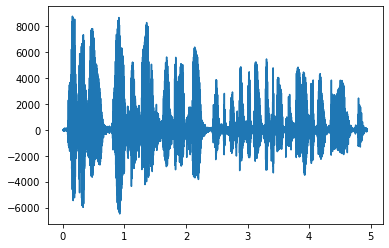

In [102]:
samplerate, data = wavfile.read('audio.wav')
length = data.shape[0]/samplerate
time = np.linspace(0., length, data.shape[0])
data = np.array(list(map(float, data)))
plt.plot(time, data[:])
plt.show()

## Реализация дискретного преобразования Фурье

In [103]:
import math

def custom_dft(data):

    #разбиваем на интервалы
    c = 0.5
    N = 2048
    offset = 0
    parts = []
    while int(c * offset) < len(data) - N:
        s = int(c * offset)
        parts.append((s, s + N))
        offset += N

    #умножаем на окно хэннинга
    test = np.array(data, copy= True)
    han = np.hanning(N)
    for part in parts:
        test[part[0]:part[1]] *= han
        
    # преобразование Фурье  
    fourier_spectrum = np.zeros(N//2)
    omega = np.exp(2*np.pi * 1j / N)
    for k in range(N // 2):
        fourier_spectrum[k] = sum(test[j] * omega ** (-k * j) for j in range(N))
    return np.abs(fourier_spectrum) / N

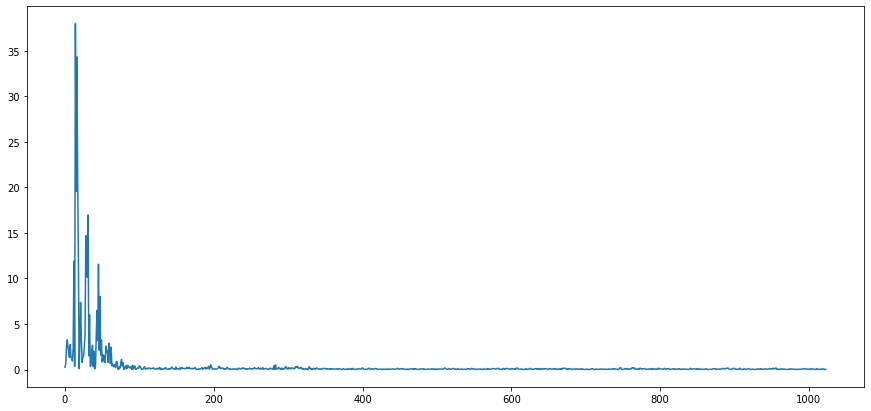

In [104]:
yf = custom_dft(data)
plt.figure(figsize = (15, 7))
plt.plot(yf)
plt.show()

## Построение траектории основного тона

In [105]:
c = 0.5
N = 2048
offset = 0
parts = []
spectrum = data
while int(c * offset) < len(spectrum) - N:
    s = int(c * offset)
    parts.append((s, s + N))
    offset += N
test = np.array(spectrum, copy= True)
han = np.hanning(N)
for part in parts:
    test[part[0]:part[1]] *= han

In [106]:
l = 0
r = 40
print(l, r, 1.5 * np.mean(yf[l:r]))
index_max = (0, 1.5 * np.mean(yf[l:r]))
mid = np.mean(yf[l:r])
for k, f in enumerate(yf[l:r]):
    if f > index_max[1]:
        index_max = k + l, f
print(f'F0 = {index_max[0] * 8}, n0 = {index_max[1]}')
first = index_max[0]
index_max

0 40 9.396909961048438
F0 = 112, n0 = 37.97799444138405


(14, 37.97799444138405)

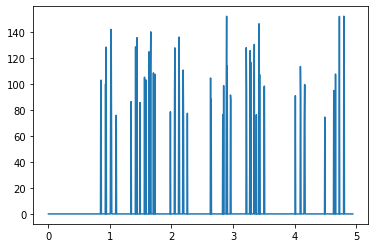

In [107]:
fr, am = index_max
ttt = []
for i, d in enumerate(yf):
    if abs(test[i * 8]/am - fr) < 5:
        ttt.append(abs(test[i * 8])/am * 8)
    else:
        ttt.append(0)
time = np.linspace(0., len(test) / samplerate, len(ttt))
plt.plot(time, ttt)
plt.show()

## Построение траектории 2й формантной частоты

In [108]:
n0 = first * 2
l = n0 - 5
r = n0 + 5
print(l, r, 1.5 * np.mean(yf[l:r]))
index_max = (0, 1.5 * np.mean(yf[l:r]))
mid = np.mean(yf[l:r])
for k, f in enumerate(yf[l:r]):
    if f > index_max[1]:
        index_max = k + l, f
print(f'F0 = {index_max[0] * 8}, n0 = {index_max[1]}')
index_max

23 33 9.62051978966566
F0 = 248, n0 = 16.967881110001905


(31, 16.967881110001905)

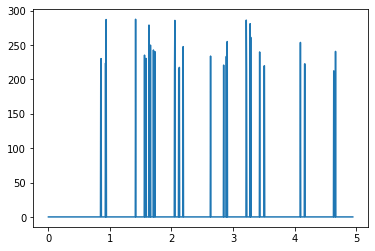

In [109]:
fr, am = index_max
ttt = []
zc = 0
for i, d in enumerate(yf):
    if abs(test[i * 8]/am - fr) < 5:
        ttt.append(abs(test[i * 8])/am * 8)
    else:
        ttt += [0]
        
time = np.linspace(0., len(test) / samplerate, len(ttt))
plt.plot(time, ttt)
plt.show()

## Построение траектории 3й формантной частоты

In [110]:
n0 = first * 3
l = n0 - 5
r = n0 + 5
index_max = (0, 1.5 * np.mean(yf[l:r]))
mid = np.mean(yf[l:r])
for k, f in enumerate(yf[l:r]):
    if f > index_max[1]:
        index_max = k + l, f
print(f'F0 = {index_max[0] * 8}, n0 = {index_max[1]}')

F0 = 360, n0 = 11.551793661254234


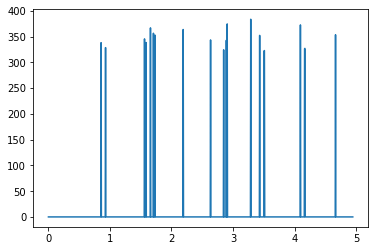

In [111]:
fr, am = index_max
ttt = []
for i, d in enumerate(yf):
    if abs(test[i * 8]/am - fr) < 5:
        ttt.append(abs(test[i * 8])/am * 8)
    else:
        ttt.append(0)
time = np.linspace(0., len(test) / samplerate, len(ttt))
plt.plot(time, ttt)
plt.show()

## Построение тракетории 4й формантной частоты

In [112]:
n0 = first * 4
l = n0 - 10
r = n0 + 10
print(l, r, np.mean(yf[l:r]))
index_max = (0, np.mean(yf[l:r]))
mid = np.mean(yf[l:r])
for k, f in enumerate(yf[l:r]):
    if f > index_max[1]:
        index_max = k + l, f
print(f'F0 = {index_max[0] * 8}, n0 = {index_max[1]}')

46 66 1.869134080374152
F0 = 376, n0 = 8.023977941485326


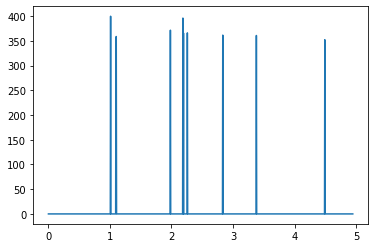

In [113]:
fr, am = index_max
ttt = []
for i, d in enumerate(yf):
    if abs(test[i * 8]/am - fr) < 3:
        ttt.append(abs(test[i * 8])/am * 8)
    else:
        ttt.append(0)

time = np.linspace(0., len(test) / samplerate, len(ttt))
plt.plot(time, ttt)
plt.show()

## Построение сонограмы

In [114]:
l = 0
r = 40
print(l, r, 1.5 * np.mean(yf[l:r]))
index_max = (0, 1.5 * np.mean(yf[l:r]))
mid = np.mean(yf[l:r])
for k, f in enumerate(yf[l:r]):
    if f > index_max[1]:
        index_max = k + l, f
print(f'F0 = {index_max[0] * 8}, n0 = {index_max[1]}')
first = index_max[0]
index_max

0 40 9.396909961048438
F0 = 112, n0 = 37.97799444138405


(14, 37.97799444138405)

In [115]:
samplerate, data = wavfile.read('audio.wav')
data = np.array(list(map(float, data)))
spectrum = custom_dft(data)

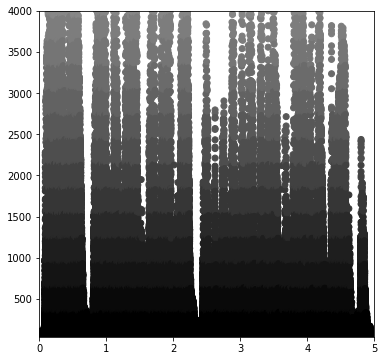

In [116]:

time = np.linspace(0., len(data) / samplerate, len(data))
m = max(spectrum)
weights = []
for a in abs(data):
    weights.append(-int(abs(a - m)/300))

fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.axis([0, 5, 40, 4000])  
sc = plt.scatter(time, abs(data), c=weights, cmap='Greys')
plt.show()

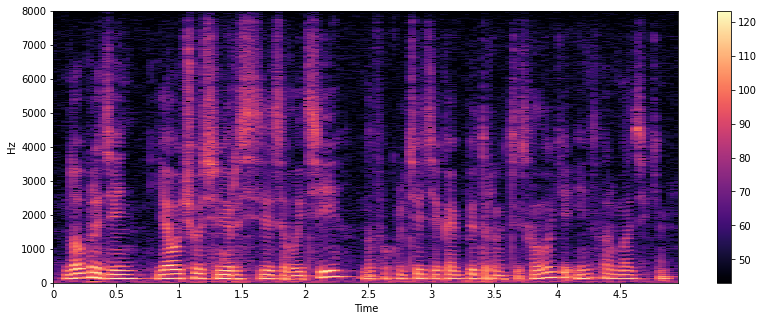

In [117]:
import librosa
import librosa.display
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()